In [ ]:
#!pip install arch

# **Part 1: Selecting a Financial Time Series Dataset**

For our second project that relates to financial risks, we chose CrowdStrike due to its critical role in cybersecurity and global market impact. A key reason for our selection is the July 2024 IT outage, caused by a faulty software update, which disrupted major industries worldwide and raised concerns about cybersecurity risk management. Using Yahoo Finance as our primary data source, our analysis will focus on financial performance, volatility trends, and risk assessment to evaluate the company's resilience and ability to recover from such crises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import skew, kurtosis, normaltest, norm




In [111]:
df = pd.read_csv("data/ENRICH/merged_stock_income.csv", index_col="Date", parse_dates=["Date"])

df.tail()

,Ticker,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding,Currency,...,Net Income (Common),Price Change %,Target,Weekday,Month,Quarter,Daily_Return,MA_5,MA_10,Log_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,APPN,10383876,39.22,40.80,38.98,39.95,39.95,485210,73401080.0,USD,...,-1.114410e+08,-87.823834,1,Thursday,3,1,-87.823834,92.528,59.413,-2.105690
2024-03-28,BHVN,7962588,57.02,57.02,54.65,54.69,54.69,841086,71043693.0,USD,...,-2.139866e+08,36.896120,1,Thursday,3,1,36.896120,90.630,59.851,0.314052
2024-03-28,ISRG,103498,401.45,402.50,397.06,399.09,399.09,1098436,352325863.0,USD,...,1.798000e+09,629.731212,0,Thursday,3,1,629.731212,167.206,98.667,1.987506
2024-03-28,CVNA,717670,90.46,92.01,85.79,87.91,87.91,4002029,201899201.0,USD,...,4.500000e+08,-77.972387,0,Thursday,3,1,-77.972387,181.948,107.212,-1.512873
2024-03-28,NOA,18589406,22.73,22.79,22.26,22.28,21.91,55147,27827282.0,USD,...,3.668843e+07,-74.655898,0,Thursday,3,1,-74.655898,120.784,102.818,-1.372624


In [116]:
df['Ticker'].unique()

array(['HEES', 'MANH', 'ERII', ..., 'AMEH', 'CENN', 'CTOS'], dtype=object)

Fetch Historical Data:



In [107]:
# Fetch the data
def fetch_ticker_data(ticker, start_date, end_date):
    ticker = ticker
    start_date = start_date
    end_date = end_date
    ticker_data = df[(df['Ticker'] == ticker) & 
                 (df.index >= start_date) & 
                 (df.index <= end_date)]
    return ticker_data
    
    
ticker_data= fetch_ticker_data('PG','2020-03-15','2025-03-25')

In [109]:
ticker_data.tail()

,Ticker,SimFinId,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding,Currency,...,Net Income (Common),Price Change %,Target,Weekday,Month,Quarter,Daily_Return,MA_5,MA_10,Log_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-22,PG,133209,162.20,162.41,161.47,161.66,157.77,6393425,2.353021e+09,USD,...,1.465300e+10,1388.581952,1,Friday,3,1,1388.581952,51.824,82.610,2.700409
2024-03-25,PG,133209,161.17,161.66,159.73,160.19,156.34,7145692,2.353021e+09,USD,...,1.465300e+10,174.957089,0,Monday,3,1,174.957089,51.144,67.150,1.011445
2024-03-26,PG,133209,160.36,161.14,160.14,160.55,156.69,5842850,2.353021e+09,USD,...,1.465300e+10,836.697783,0,Tuesday,3,1,836.697783,56.654,42.416,2.237191
2024-03-27,PG,133209,161.36,162.74,161.34,162.61,158.70,6599711,2.353021e+09,USD,...,1.465300e+10,351.819950,0,Wednesday,3,1,351.819950,56.606,82.279,1.508114
2024-03-28,PG,133209,162.82,163.14,161.70,162.25,158.35,7191571,2.353021e+09,USD,...,1.465300e+10,230.380778,0,Thursday,3,1,230.380778,129.332,70.363,1.195076


# **PART 2 : EDA **

Plot the Raw Time Series:



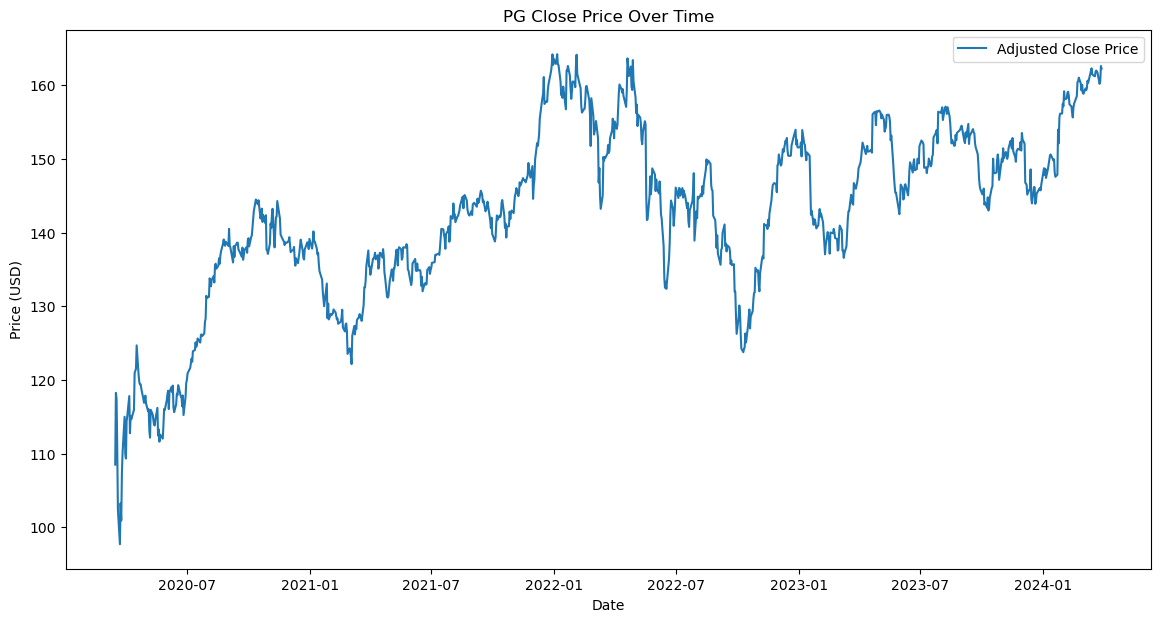

In [74]:
def plot_raw_time_series(ticker_df):
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_df['Close'], label='Adjusted Close Price')
    plt.title(f'{ticker_df['Ticker'].unique()[0]} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    return plt.show()

plot_raw_time_series(ticker_data)

Compute and Analyze Log-Returns:



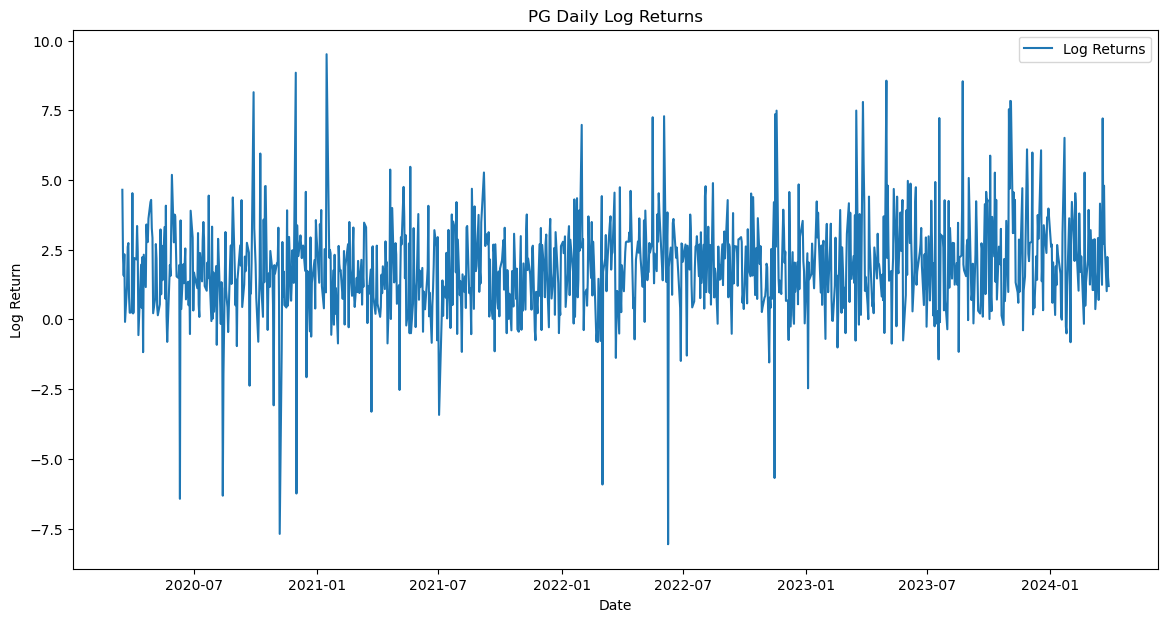

In [78]:
# Drop the NaN values resulting from the shift operation
log_returns = ticker_data['Log_Returns'].dropna()


# Plot log-returns
plt.figure(figsize=(14, 7))
plt.plot(log_returns, label='Log Returns')
plt.title(f'{ticker_data['Ticker'].unique()[0]} Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

Summary Statistics and Stationarity Test:



In [80]:
# Summary statistics
summary_stats = log_returns.describe()
print("Summary Statistics:\n", summary_stats)



Summary Statistics:
 count    1016.000000
mean        1.884618
std         1.807604
min        -8.062741
25%         0.792820
50%         1.821352
75%         2.819429
max         9.508814
Name: Log_Returns, dtype: float64


Checking for stationarity using the Augmented Dickey-Fuller (ADF) test.


In [81]:
# Perform ADF test
adf_result = adfuller(log_returns)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -15.49641247879613
p-value: 2.447243790292112e-28


A lower (more negative) ADF statistic provides stronger evidence against the null hypothesis (H0: the series is non-stationary).

Autocorrelation and Partial Autocorrelation:



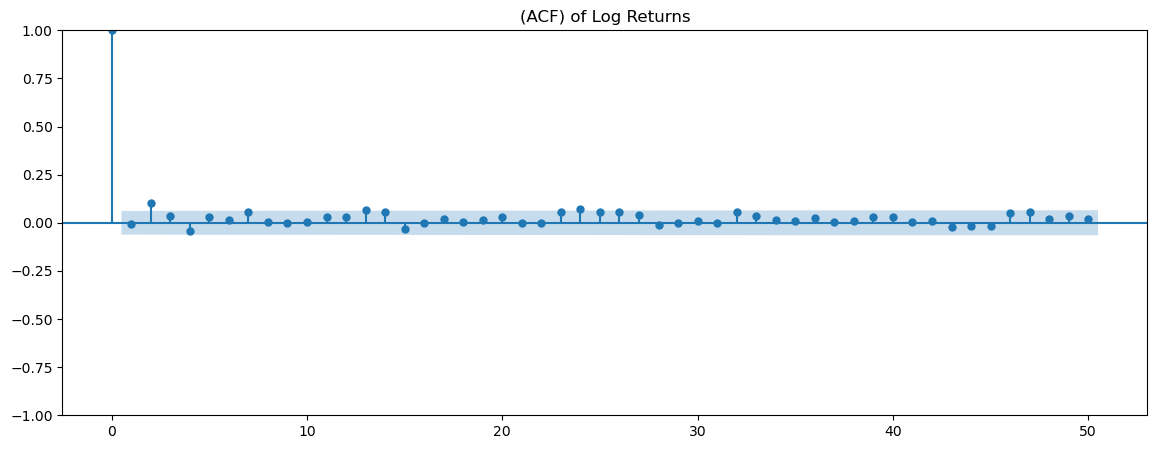

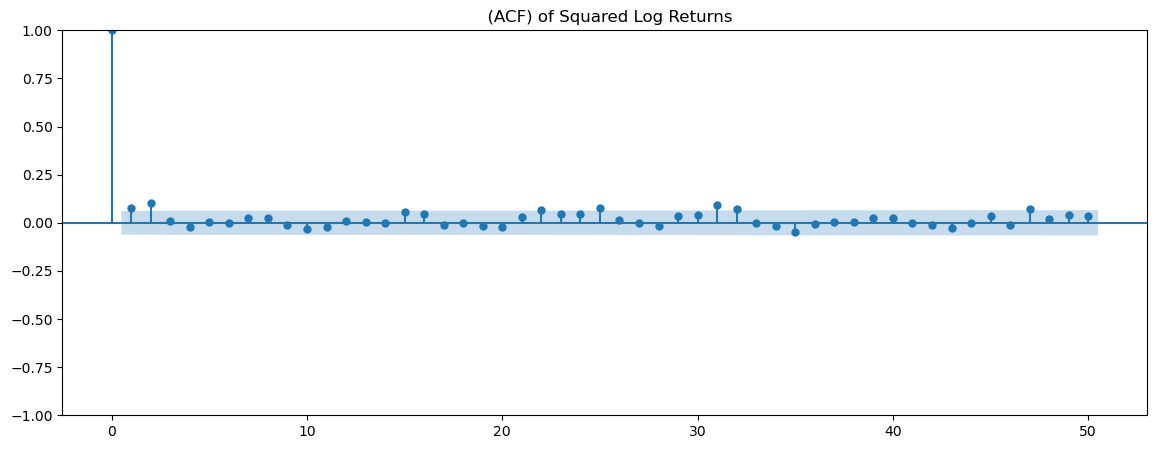

In [82]:
# Plot ACF
plt.figure(figsize=(14, 5))
plot_acf(log_returns, lags=50, ax=plt.gca())
plt.title('(ACF) of Log Returns')
plt.show()

# Compute squared log returns
squared_log_returns = log_returns**2

# Plot ACF of squared log returns
plt.figure(figsize=(14, 5))
plot_acf(squared_log_returns, lags=50, ax=plt.gca())
plt.title('  (ACF) of Squared Log Returns')
plt.show()


# **Part 3: Volatility Modeling**

**FITTING A T-DISTRIBUTION**

Fitted t-distribution parameters:
Degrees of Freedom: 4.7535
Location: 1.8540
Scale: 1.3616
Variance: 3.2006
Kurtosis: 7.9630


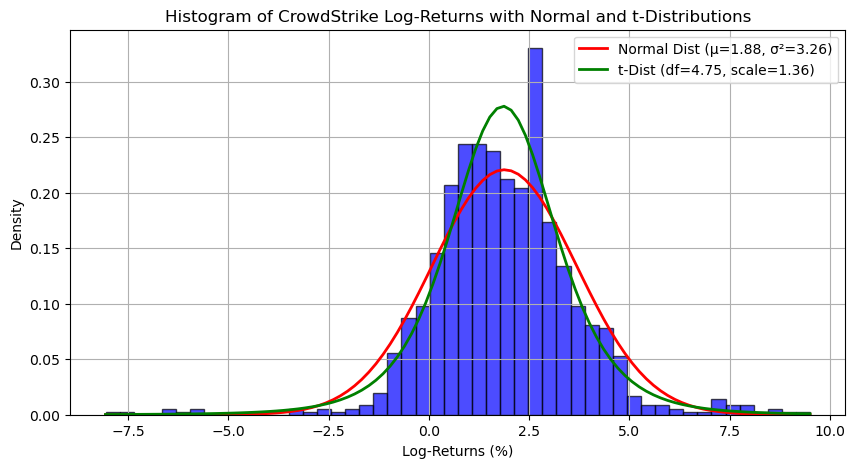

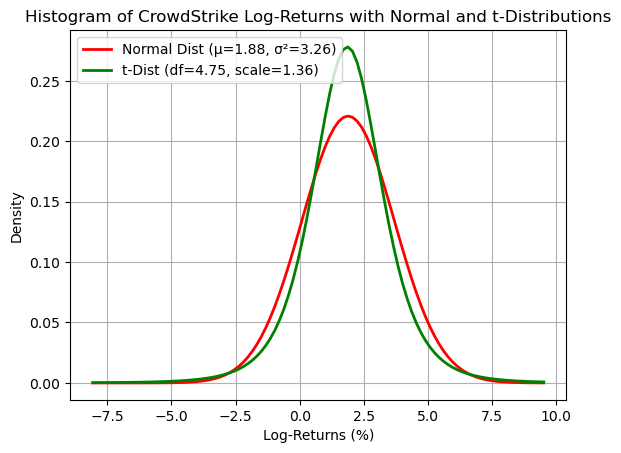

In [83]:
# Fit a t-distribution to the log-returns
params = t.fit(log_returns)  # Direct fitting

# Extract fitted parameters
df_t, loc_t, scale_t = params

# Compute variance and kurtosis of the fitted t-distribution
variance_t = (df_t / (df_t - 2)) * (scale_t ** 2) if df_t > 2 else np.nan
kurtosis_t = (6 / (df_t - 4)) if df_t > 4 else np.inf  # Infinite for df <= 4

# Print fitted parameters and statistics
print(f"Fitted t-distribution parameters:")
print(f"Degrees of Freedom: {df_t:.4f}")
print(f"Location: {loc_t:.4f}")
print(f"Scale: {scale_t:.4f}")
print(f"Variance: {variance_t:.4f}")
print(f"Kurtosis: {'Infinite' if np.isinf(kurtosis_t) else f'{kurtosis_t:.4f}'}")

# Fit a t-distribution to the log-returns
params = t.fit(log_returns)  # Direct fitting

# Extract fitted parameters
df_t, loc_t, scale_t = params

# Compute variance and kurtosis of the fitted t-distribution
variance_t = (df_t / (df_t - 2)) * (scale_t ** 2) if df_t > 2 else np.nan
kurtosis_t = (6 / (df_t - 4)) if df_t > 4 else np.inf  # Infinite for df <= 4


# Plot histogram with normal and t-distribution curves
plt.figure(figsize=(10, 5))
count, bins, _ = plt.hist(log_returns, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)

# Compute normal and t-distribution curves
x = np.linspace(bins[0], bins[-1], 100)
pdf_norm = norm.pdf(x, np.mean(log_returns), np.std(log_returns))
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

plt.plot(x, pdf_norm, color='red', lw=2, label=f'Normal Dist (μ={np.mean(log_returns):.2f}, σ²={np.var(log_returns):.2f})')
plt.plot(x, pdf_t, color='green', lw=2, label=f't-Dist (df={df_t:.2f}, scale={scale_t:.2f})')

plt.xlabel("Log-Returns (%)")
plt.ylabel("Density")
plt.title("Histogram of CrowdStrike Log-Returns with Normal and t-Distributions")
plt.legend()
plt.grid()
plt.show()
x = np.linspace(bins[0], bins[-1], 100)
pdf_norm = norm.pdf(x, np.mean(log_returns), np.std(log_returns))
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

plt.plot(x, pdf_norm, color='red', lw=2, label=f'Normal Dist (μ={np.mean(log_returns):.2f}, σ²={np.var(log_returns):.2f})')
plt.plot(x, pdf_t, color='green', lw=2, label=f't-Dist (df={df_t:.2f}, scale={scale_t:.2f})')

plt.xlabel("Log-Returns (%)")
plt.ylabel("Density")
plt.title("Histogram of CrowdStrike Log-Returns with Normal and t-Distributions")
plt.legend()
plt.grid()
plt.show()


The t-distribution provides better tail estimates, making it more suitable for financial risk modeling (e.g., Value at Risk (VaR) and stress testing

**FITTING A GARCH MODEL**



In [84]:
from arch import arch_model


In [86]:
returns = log_returns.dropna()


models = {
    'GARCH(1,0)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=1,o=0, q=0, dist='t').fit(disp='off'),
    'GARCH(1,1)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=1,o=0, q=1, dist='t').fit(disp='off'),
    'GARCH(2,1)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=2,o=0, q=1, dist='t').fit(disp='off'),
    'GARCH(1,2)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=1, o=0,q=2, dist='t').fit(disp='off'),
    'GARCH(2,2)': arch_model(returns, mean='AR', lags=1, vol='Garch', p=2,o=0, q=2, dist='t').fit(disp='off'),
    'GJR-GARCH(1,1,1)': arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=1, o=1, q=1, dist='t').fit(disp='off'),
    'GJR-GARCH(2,1,1)': arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=2, o=1, q=1, dist='t').fit(disp='off'),
    'GJR-GARCH(1,1,2)': arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=1, o=1, q=2, dist='t').fit(disp='off'),
    'GJR-GARCH(2,1,2)': arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=2, o=1, q=2, dist='t').fit(disp='off')
}

# Compare AIC and BIC values
for name, model in models.items():
    print(f"{name}: AIC = {model.aic:.2f}, BIC = {model.bic:.2f}")




GARCH(1,0): AIC = 3955.94, BIC = 3980.56
GARCH(1,1): AIC = 3957.94, BIC = 3987.48
GARCH(2,1): AIC = 3959.94, BIC = 3994.40
GARCH(1,2): AIC = 3959.94, BIC = 3994.40
GARCH(2,2): AIC = 3961.94, BIC = 4001.32
GJR-GARCH(1,1,1): AIC = 3959.41, BIC = 3993.87
GJR-GARCH(2,1,1): AIC = 3961.41, BIC = 4000.79
GJR-GARCH(1,1,2): AIC = 3961.41, BIC = 4000.79
GJR-GARCH(2,1,2): AIC = 3963.41, BIC = 4007.71


In [87]:
# Find the model with the lowest AIC and BIC
best_model_aic = min(models, key=lambda x: models[x].aic)
best_model_bic = min(models, key=lambda x: models[x].bic)

# Extract the corresponding AIC and BIC values
lowest_aic = models[best_model_aic].aic
lowest_bic = models[best_model_bic].bic

# Print results
print(f"Best model based on AIC: {best_model_aic} with AIC = {lowest_aic:.2f}")
print(f"Best model based on BIC: {best_model_bic} with BIC = {lowest_bic:.2f}")

Best model based on AIC: GARCH(1,0) with AIC = 3955.94
Best model based on BIC: GARCH(1,0) with BIC = 3980.56


To account for this asymmetry in volatility, we have implemented the GJR-GARCH model and we used best model based on lowest BIC


Model Summary:
                            AR - GJR-GARCH Model Results                            
Dep. Variable:                  Log_Returns   R-squared:                      -0.000
Mean Model:                              AR   Adj. R-squared:                 -0.001
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1972.70
Distribution:      Standardized Student's t   AIC:                           3959.41
Method:                  Maximum Likelihood   BIC:                           3993.87
                                              No. Observations:                 1015
Date:                      Mon, Mar 24 2025   Df Residuals:                     1013
Time:                              20:24:30   Df Model:                            2
                                   Mean Model                                   
                    coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------

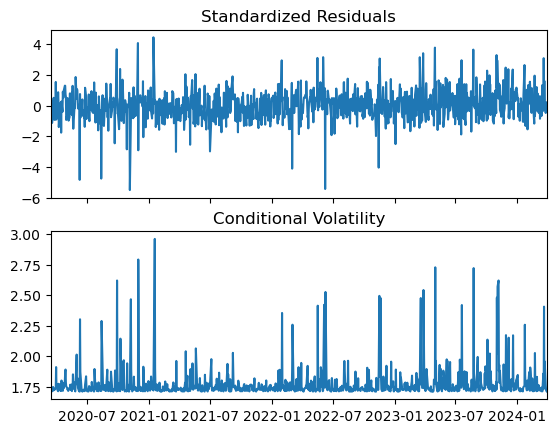

In [97]:
from arch import arch_model

from statsmodels.tsa.arima.model import ARIMA

# Prepare the data
returns = log_returns.dropna()

# Fit GARCH(1,1) model with t-distributed errors
garch_model = arch_model(returns, mean = 'AR', lags= 1, vol='Garch', p=1, o=1, q=1, dist='t')
garch_fit = garch_model.fit(disp='off')
print("\nModel Summary:")
print(garch_fit.summary())

# Plot GJR-GARCH model results
fig = garch_fit.plot()
plt.show()

**# VISUALIZING VOLATILITY**

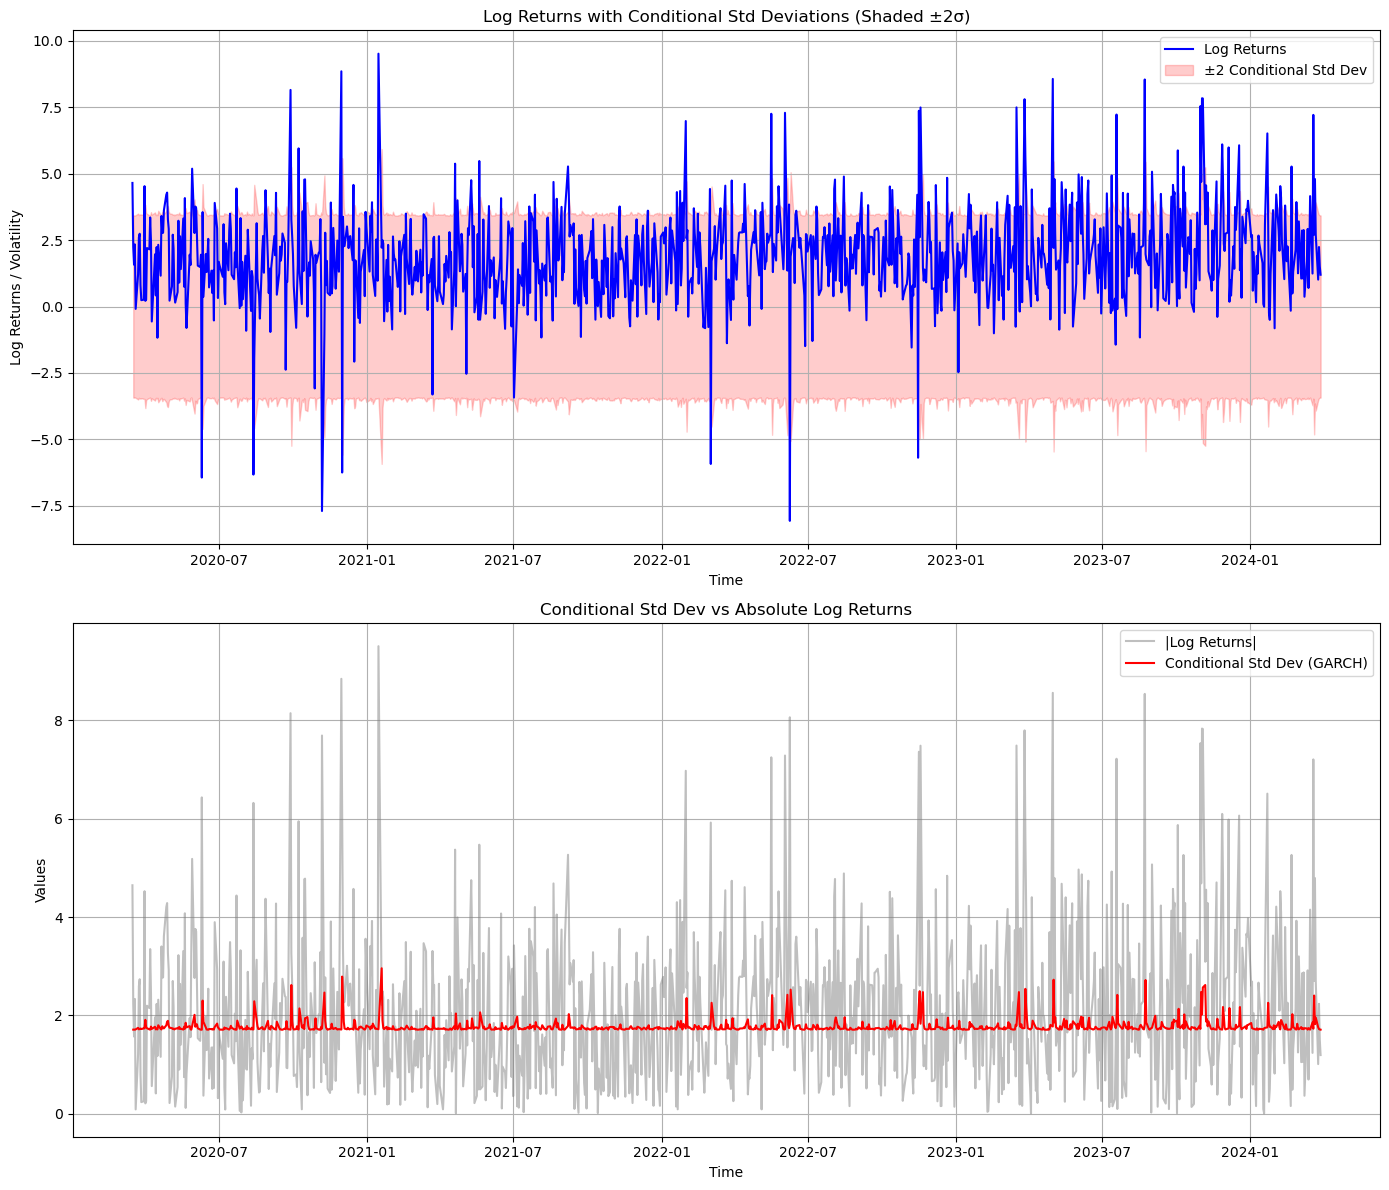

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that log returns and conditional volatility are available
conditional_volatility = garch_fit.conditional_volatility  # GJR-GARCH(1,1,1) fitted volatility
absolute_log_returns = np.abs(log_returns)  # Absolute log-returns

# Create a figure with two stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# --- Plot 1: Log Returns with Conditional Volatility Bands ---
axs[0].plot(log_returns, label='Log Returns', color='blue')
upper_bound = 2 * conditional_volatility
lower_bound = -2 * conditional_volatility
axs[0].fill_between(log_returns.index, lower_bound, upper_bound, color='red', alpha=0.2, label='±2 Conditional Std Dev')

axs[0].set_title('Log Returns with Conditional Std Deviations (Shaded ±2σ)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Log Returns / Volatility')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Conditional Std Dev vs. Absolute Log Returns ---
axs[1].plot(absolute_log_returns, label='|Log Returns|', color='gray', alpha=0.5)
axs[1].plot(conditional_volatility, label='Conditional Std Dev (GARCH)', color='red')

axs[1].set_title('Conditional Std Dev vs Absolute Log Returns')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


**Volatility Clustering**

The blue line (log-returns) exhibits clear periods of high volatility followed by high volatility, and low volatility followed by low volatility.
This confirms the volatility clustering effect, which is well captured by the GARCH model.

**Conditional Volatility Bands **

The red shaded area represents +/- 2 times the conditional standard deviation
When the log-returns move outside these bands, it suggests extreme market moves.

**Risk Events**

Significant spikes in volatility (blue line breaking out of the red bands) correspond to major market events (e.g., earnings reports, economic news, or the July 2024 IT outage crisis).


Thefore, GARCH model effectively capture volatility forecasts dynamically, reacting to market shocks.

**RESIDUAL ANALYSIS**


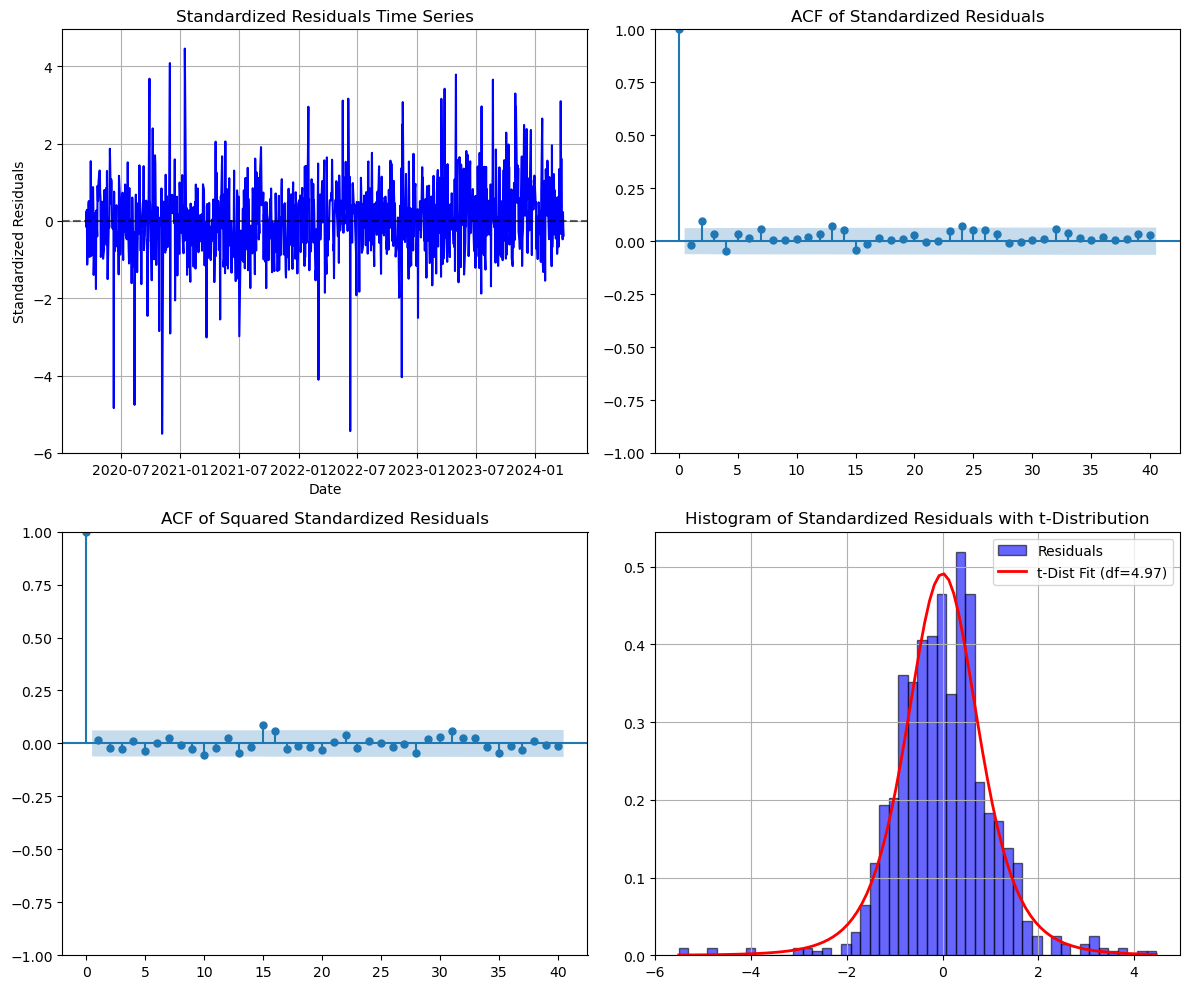

In [90]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t

# Ensure GARCH model is fitted
conditional_volatility = garch_fit.conditional_volatility  # Conditional standard deviation from GARCH
std_residuals = garch_fit.resid / conditional_volatility  # Compute standardized residuals
std_residuals = std_residuals.dropna()  # Drop NaNs

# Set up a 2x2 subplot for residual analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- 1. Standardized Residuals Time Series ---
sns.lineplot(x=std_residuals.index, y=std_residuals, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Standardized Residuals Time Series")
axes[0, 0].set_ylabel("Standardized Residuals")
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.6)
axes[0, 0].grid(True)

# --- 2. ACF of Standardized Residuals ---
plot_acf(std_residuals, ax=axes[0, 1], lags=40)
axes[0, 1].set_title("ACF of Standardized Residuals")

# --- 3. ACF of Squared Standardized Residuals ---
plot_acf(std_residuals**2, ax=axes[1, 0], lags=40)
axes[1, 0].set_title("ACF of Squared Standardized Residuals")

# --- 4. Histogram with t-Distribution Fit ---
# Fit a t-distribution to the residuals
df_t, loc_t, scale_t = t.fit(std_residuals)
x = np.linspace(min(std_residuals), max(std_residuals), 100)
pdf_t = t.pdf(x, df_t, loc=loc_t, scale=scale_t)

# Plot histogram of standardized residuals
axes[1, 1].hist(std_residuals, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black', label="Residuals")
axes[1, 1].plot(x, pdf_t, color='red', lw=2, label=f't-Dist Fit (df={df_t:.2f})')
axes[1, 1].set_title("Histogram of Standardized Residuals with t-Distribution")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


# Part 4 : Forecasting

In-sample & Out-of-sample Data (One Step Ahead & 12 Month Forecasting)

In [104]:
import plotly.graph_objects as go

# Train-test split: Exclude the last 30 days for testing
train_data = ticker_data.iloc[:-30]  # (everything except last 30 days)
test_data = ticker_data.iloc[-30:]   # (last 30 days)

# Fit GJR-GARCH(1,1,1) model on the training data
garch_model = arch_model(train_data["Log_Returns"], mean='AR', lags=1, vol='Garch', p=1, o=1, q=1, dist='t')
garch_fit = garch_model.fit(disp='off')

# In-Sample Forecast
train_data["conditional_volatility"] = garch_fit.conditional_volatility  # Model’s in-sample predictions

# Rolling One-Step Ahead Forecast
one_step_forecasts = []
one_step_ci_lower = []
one_step_ci_upper = []

for date in test_data.index:
    updated_model = arch_model(ticker_data.loc[:date, "Log_Returns"], mean='AR', lags=1, vol='Garch', p=1, o=1, q=1, dist='t').fit(disp='off')

    # Forecast one step ahead
    forecast_obj = updated_model.forecast(horizon=1)
    forecast_value_log = forecast_obj.mean.iloc[-1, 0]
    ci_log = forecast_obj.variance.iloc[-1, 0] ** 0.5 * 1.96  # 95% confidence interval

    # Convert log forecasts back to original scale
    forecast_value = np.expm1(forecast_value_log)
    ci_lower = np.expm1(forecast_value_log - ci_log)
    ci_upper = np.expm1(forecast_value_log + ci_log)

    one_step_forecasts.append(forecast_value)
    one_step_ci_lower.append(ci_lower)
    one_step_ci_upper.append(ci_upper)

one_step_forecasts = pd.Series(one_step_forecasts, index=test_data.index)
one_step_ci_lower = pd.Series(one_step_ci_lower, index=test_data.index)
one_step_ci_upper = pd.Series(one_step_ci_upper, index=test_data.index)

# Confidence Interval for 12-Month Forecast
residuals = train_data["Log_Returns"] - garch_fit.conditional_volatility  
std_dev = np.std(residuals)
confidence_interval = np.exp(1.96 * std_dev)  

# Rolling One-Step Ahead Forecast
fig1 = go.Figure()

# Actual Data
fig1.add_trace(go.Scatter(
    x=ticker_data.index,
    y=np.expm1(ticker_data["Log_Returns"]),
    mode='lines',
    name='Actual Log Returns',
    line=dict(color='blue')
))

# In-Sample Predictions
fig1.add_trace(go.Scatter(
    x=train_data.index,
    y=np.expm1(train_data["conditional_volatility"]),
    mode='lines',
    name='In-Sample Prediction',
    line=dict(color='red', dash='dash')
))

# Rolling One-Step Forecast
fig1.add_trace(go.Scatter(
    x=one_step_forecasts.index,
    y=one_step_forecasts,
    mode='lines',
    name='One-Step Forecast',
    line=dict(color='green', dash='dot')
))

# Confidence Interval - Shaded Region
fig1.add_trace(go.Scatter(
    x=one_step_forecasts.index.tolist() + one_step_forecasts.index[::-1].tolist(),
    y=one_step_ci_upper.tolist() + one_step_ci_lower[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='95% Confidence Interval'
))

# Customize Layout
fig1.update_layout(
    title="Rolling One-Step Ahead Forecast for Log Returns",
    xaxis_title="Date",
    yaxis_title="Log Returns",
    template="plotly_dark",
    hovermode="x unified"
)

fig1.show()

C:\Users\bburg\AppData\Local\Temp\ipykernel_15556\3872443000.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
# Fit GJR-GARCH(1,1,1) model on the training data
garch_model = arch_model(train_data["Log_Returns"], mean='AR', lags=1, vol='Garch', p=1, o=1, q=1, dist='t')
garch_fit = garch_model.fit(disp='off')

# Rolling One-Step Ahead Forecast
one_step_forecasts = []

for date in test_data.index:
    updated_model = arch_model(ticker_data.loc[:date, "Log_Returns"], mean='AR', lags=1, vol='Garch', p=1, o=1, q=1, dist='t').fit(disp='off')

    # Forecast one step ahead
    forecast_obj = updated_model.forecast(horizon=1)
    forecast_value_log = forecast_obj.mean.iloc[-1, 0]

    one_step_forecasts.append(forecast_value_log)

one_step_forecasts = pd.Series(one_step_forecasts, index=test_data.index)

# Extract the last forecasted log return value
last_forecast_log_return = one_step_forecasts.iloc[-1]

# Convert the log return forecast to the actual price
initial_price = ticker_data["Close"].iloc[-1]  # The last close price before the test period
predicted_price = initial_price * np.exp(last_forecast_log_return)

print(f"Last recorded closing price: {initial_price}")
print(f"Forecasted Log Returns: {last_forecast_log_return}")
print(f"Tomorrow's predicted price: {predicted_price}")

Last recorded closing price: 162.25
Forecasted Log Returns: 1.8444074447252627
Tomorrow's predicted price: 1026.1259744508666


In [105]:
# Fit GJR-GARCH(1,1,1) model on the entire dataset
garch_model = arch_model(ticker_data["Log_Returns"], mean='AR', lags=1, vol='Garch', p=1, o=1, q=1, dist='t')
garch_fit = garch_model.fit(disp='off')

# Forecast the next day's log return
forecast_obj = garch_fit.forecast(horizon=1)
forecast_value_log = forecast_obj.mean.iloc[-1, 0]

# Convert the log return forecast to the actual price
last_close_price = ticker_data["Close"].iloc[-1]  # The last close price in the dataset
predicted_price = last_close_price * np.exp(forecast_value_log)

print(f"Last recorded closing price: {last_close_price}")
print(f"Forecasted Log Return: {forecast_value_log}")
print(f"Tomorrow's predicted price: {predicted_price}")

Last recorded closing price: 162.25
Forecasted Log Return: 1.8444074447252627
Tomorrow's predicted price: 1026.1259744508666


# Evaluating model performance

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Calculate the evaluation metrics
mse = mean_squared_error(test_data["Log_Returns"], one_step_forecasts)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data["Log_Returns"], one_step_forecasts)
r2 = r2_score(test_data["Log_Returns"], one_step_forecasts)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")



R-squared: -0.0656524202319797
Mean Squared Error (MSE): 2.616644409782863
Root Mean Squared Error (RMSE): 1.617604528240096
Mean Absolute Error (MAE): 1.183166385468288


In [95]:
#For comparative purposes - compare to standard deviation of data and other metrics
print(test_data["Log_Returns"].describe()) 


count    30.000000
mean      2.273750
std       1.593772
min      -0.158961
25%       1.206155
50%       2.060185
75%       2.870669
max       7.206810
Name: Log_Returns, dtype: float64


# **Part 5 : Risk Modeling**

# **VaR**

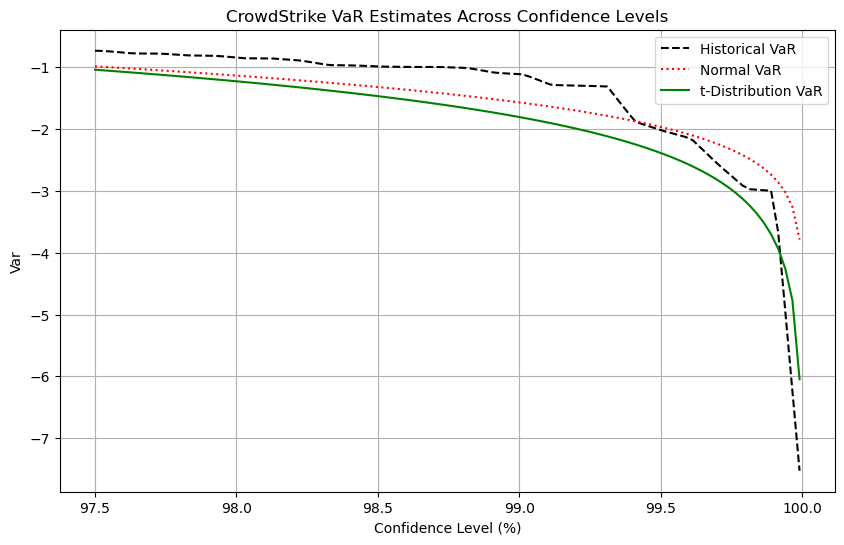

In [47]:
# Define confidence levels for VaR estimation
confidence_levels = np.linspace(0.975, 0.9999, 100)

# Compute Historical VaR (Percentile-based)
VaR_hist = [np.percentile(returns, (1 - alpha) * 100) for alpha in confidence_levels]

# Compute Normal VaR (Assuming normal distribution of returns)
VaR_norm = [norm.ppf(1 - alpha, loc=np.mean(returns), scale=np.std(returns)) for alpha in confidence_levels]

# Fit a t-distribution to returns and compute VaR based on the t-distribution
df_t, loc_t, scale_t = t.fit(returns)
VaR_t = [loc_t + scale_t * t.ppf(1 - alpha, df_t) for alpha in confidence_levels]

# Plot VaR estimates across confidence levels
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels * 100, VaR_hist, label='Historical VaR', linestyle='dashed', color='black')
plt.plot(confidence_levels * 100, VaR_norm, label='Normal VaR', linestyle='dotted', color='red')
plt.plot(confidence_levels * 100, VaR_t, label='t-Distribution VaR', linestyle='solid', color='green')

plt.xlabel("Confidence Level (%)")
plt.ylabel("Var")
plt.title("CrowdStrike VaR Estimates Across Confidence Levels")
plt.legend()
plt.grid()
plt.show()

log-returns with  normal distribution underestimates risk in extreme market conditions, as financial data often has fat tails (large fluctuations).while log-returns with  t-Distribution Captures fat-tailed behavior, making it more accurate for financial risk modeling.

# **Risk Management **

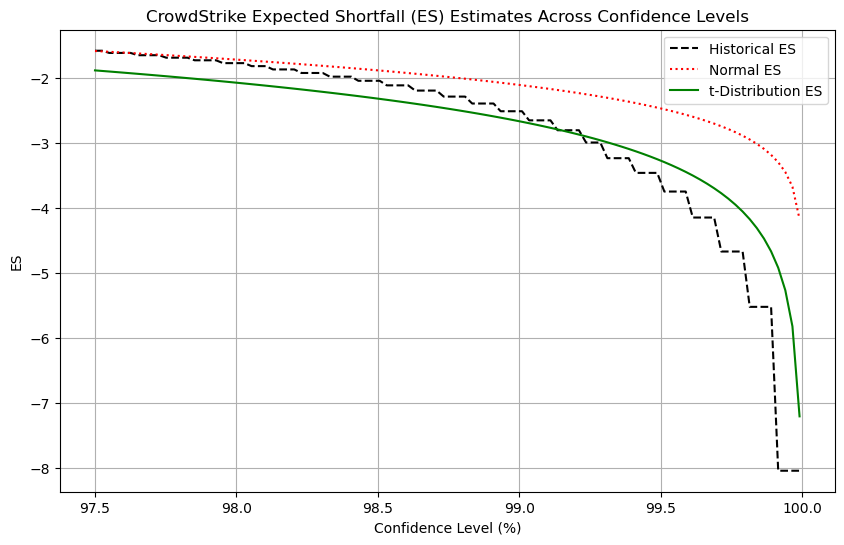

In [48]:
# Compute Expected Shortfall (ES) using different methods
mean_return, std_return = returns.mean(), returns.std()

# Compute Normal ES
phi_norm = norm.pdf(norm.ppf(confidence_levels))
ES_norm = mean_return - std_return * (phi_norm / (1 - confidence_levels))

# Compute t-Distribution Expected Shortfall (ES)
t_alpha = t.ppf(confidence_levels, df_t)
t_pdf_alpha = t.pdf(t_alpha, df_t)
ES_t = loc_t - scale_t * (t_pdf_alpha / (1 - confidence_levels)) * (df_t + t_alpha**2) / (df_t - 1)

# Compute Historical Expected Shortfall (ES) directly from data
ES_hist = [returns[returns <= VaR_hist[i]].mean() for i in range(len(confidence_levels))]

# Plot Expected Shortfall (ES) estimates across confidence levels
plt.figure(figsize=(10, 6))
plt.plot(confidence_levels * 100, ES_hist, label='Historical ES', linestyle='dashed', color='black')
plt.plot(confidence_levels * 100, ES_norm, label='Normal ES', linestyle='dotted', color='red')
plt.plot(confidence_levels * 100, ES_t, label='t-Distribution ES', linestyle='solid', color='green')

plt.xlabel("Confidence Level (%)")
plt.ylabel("ES")
plt.title("CrowdStrike Expected Shortfall (ES) Estimates Across Confidence Levels")
plt.legend()
plt.grid()
plt.show()


At high confidence levels , historical ES aligns closely with t-Distribution ES. While Normal ES consistently underestimates tail risk


**DYNAMIC RISK MODELING**



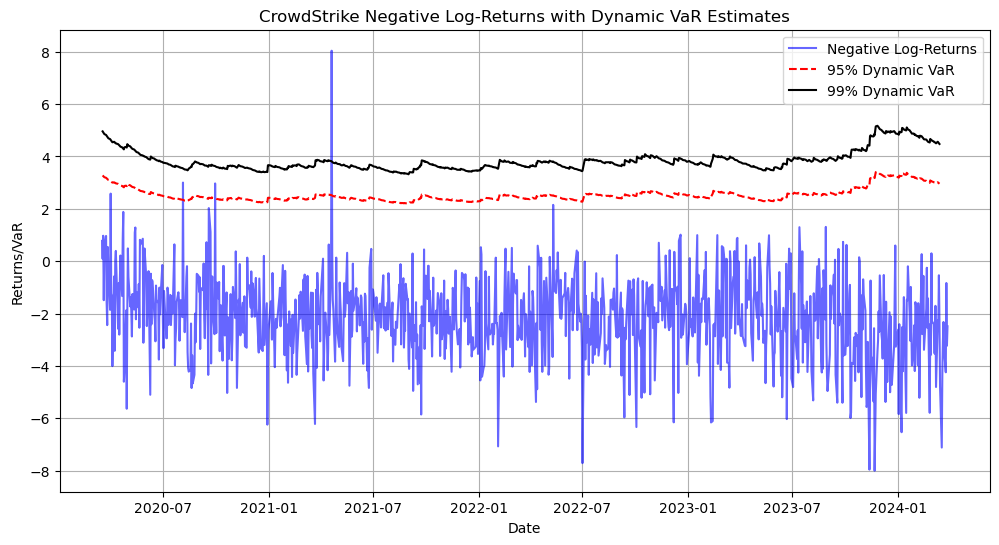

In [49]:
# Extract conditional volatility and standardized residuals
cond_volatility = garch_fit.conditional_volatility.dropna()
std_residuals = garch_fit.resid / cond_volatility
std_residuals = std_residuals.dropna()

# Fit a t-distribution to standardized residuals
df_t, loc_t, scale_t = t.fit(std_residuals)

# Compute dynamic VaR at 95% and 99% confidence levels
VaR_95 = -scale_t * t.ppf(0.05, df_t) * cond_volatility
VaR_99 = -scale_t * t.ppf(0.01, df_t) * cond_volatility

# Plot negative log-returns with dynamic VaR estimates
plt.figure(figsize=(12, 6))
plt.plot(-returns, label="Negative Log-Returns", color='blue', alpha=0.6)
plt.plot(VaR_95, label="95% Dynamic VaR", linestyle='dashed', color='red')
plt.plot(VaR_99, label="99% Dynamic VaR", linestyle='solid', color='black')

plt.xlabel("Date")
plt.ylabel("Returns/VaR")
plt.title("CrowdStrike Negative Log-Returns with Dynamic VaR Estimates")
plt.legend()
plt.grid()
plt.show()

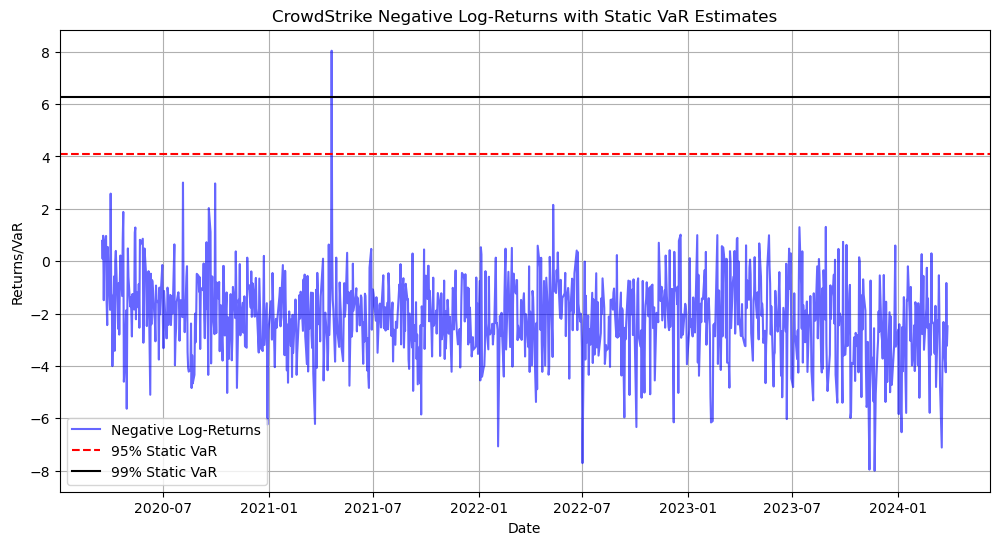

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Compute historical standard deviation (static volatility estimate)
historical_vol = np.std(returns)

# Fit a t-distribution to the returns
df_t, loc_t, scale_t = t.fit(returns)

# Compute **Static** VaR at 95% and 99% confidence levels
VaR_95_static = -scale_t * t.ppf(0.05, df_t) * historical_vol
VaR_99_static = -scale_t * t.ppf(0.01, df_t) * historical_vol

# Plot negative log-returns with **Static VaR Estimates**
plt.figure(figsize=(12, 6))
plt.plot(-returns, label="Negative Log-Returns", color='blue', alpha=0.6)

# Plot **Static VaR** as horizontal lines
plt.axhline(y=VaR_95_static, color='red', linestyle='dashed', label="95% Static VaR")
plt.axhline(y=VaR_99_static, color='black', linestyle='solid', label="99% Static VaR")

plt.xlabel("Date")
plt.ylabel("Returns/VaR")
plt.title("CrowdStrike Negative Log-Returns with Static VaR Estimates")
plt.legend()
plt.grid()
plt.show()


Static risk models tend to underestimate losses during periods of high volatility.
That's why GARCH-based Dynamic VaR are more suitable for looking at company returns







